NNopt Optimizing Function
---

In [2]:
import numpy as np
def black_box_function(a):
    """Function with unknown internals we wish to maximize.

    This is just serving as an example, for all intents and
    purposes think of the internals of this function, i.e.: the process
    which generates its output values, as unknown.
    """
   
    return -np.float_power(a, 2) * np.sin(2 * a)


In [3]:
from nnopt.nnopt import Optimizer

Nopt = Optimizer(black_box_function, 
                 N=1, 
                 surrogate_hidden_layer=200, 
                 memory_hidden_layer=200,
                 Rn=[(-10, 10)]) 


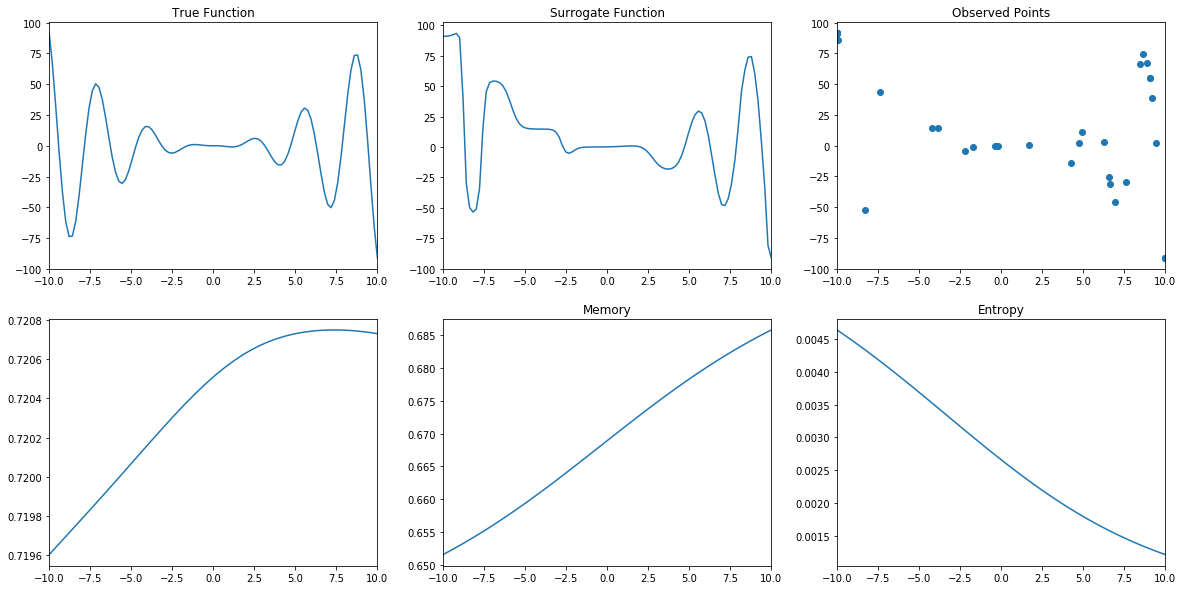

Maximum found [-10.] 91.29452507276277


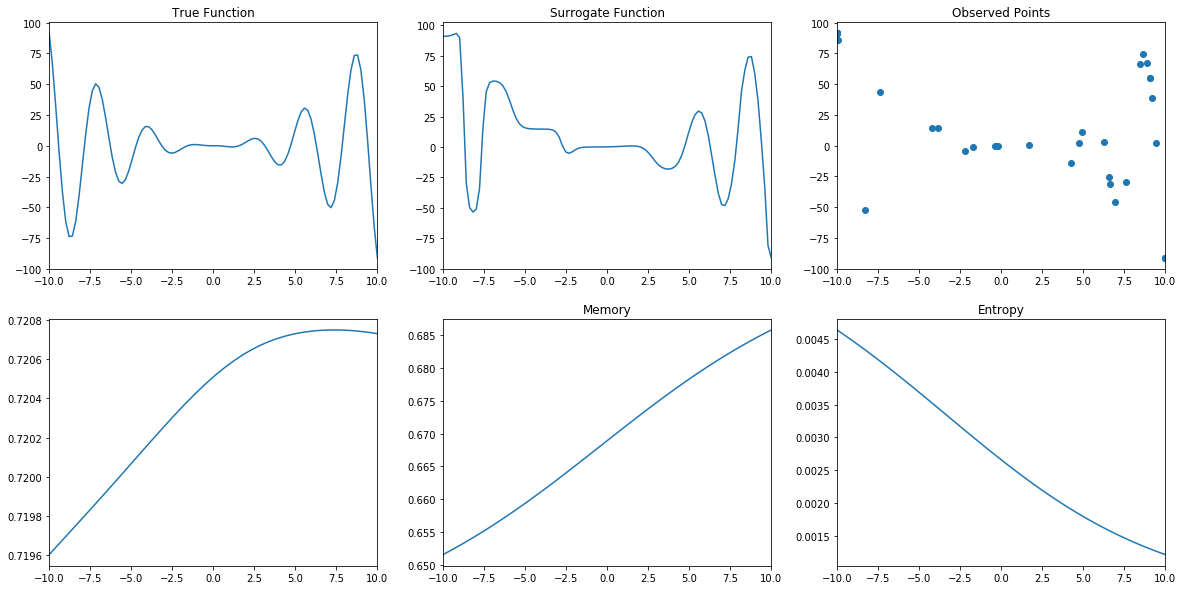

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython import display
display.clear_output(wait=True)
fig, ((true, surr, obs), (model, mem, entr)),  = plt.subplots(2, 3, figsize=(20, 10))

MINI = -10
MAXI = 10
true.set_xlim([MINI, MAXI])
obs.set_xlim([MINI, MAXI])
surr.set_xlim([MINI, MAXI])
entr.set_xlim([MINI, MAXI])

true_x = np.linspace(MINI, MAXI, 100)



def plot_ob_sur_ent():
    obs.cla()
    surr.cla()
    entr.cla()
    mem.cla()
    model.cla()
    
    obs.set_xlim([MINI, MAXI])
    surr.set_xlim([MINI, MAXI])
    entr.set_xlim([MINI, MAXI])
    mem.set_xlim([MINI, MAXI])
    model.set_xlim([MINI, MAXI])
    obs.set_title("Observed Points")
    surr.set_title("Surrogate Function")
    entr.set_title("Entropy")
    mem.set_title("Memory")


    ys = []
    es = []
    for tx in true_x:
        y, ent = Nopt.predict(np.array([[tx]]))
        ys.append(y)
        es.append(ent)
        
    ms = Nopt.mem_pred(true_x.reshape(-1, 1))
    mos = Nopt.model_pred(true_x.reshape(-1, 1))

    display.clear_output(wait=True)

    X = np.array(Nopt.N_samples).reshape(-1)
    obs.scatter(X, Nopt.M_samples)
    surr.plot(true_x, ys)
    entr.plot(true_x, es)
    model.plot(true_x, mos)
    mem.plot(true_x, ms)
    display.display(fig)

    

true.set_title("True Function")
obs.set_title("Observed Points")
surr.set_title("Surrogate Function")
entr.set_title("Entropy")

true_y = black_box_function(true_x)

true.plot(true_x, true_y)


Nopt.forget()
INIT = 20
for _ in range(INIT):
    Nopt.sample(verbose=False)
plot_ob_sur_ent()    
time.sleep(15)
Nopt.fit(100)
ITERS = 20
while ITERS > 0:
    sugg = Nopt.optimize(exploration=10)
    Nopt.sample(sugg, verbose=False)
    Nopt.fit(1000, forgetting=False)
    plot_ob_sur_ent()    
    ITERS -= 1

print("Maximum found", Nopt.N_samples[np.argmax(Nopt.M_samples)], max(Nopt.M_samples))

In [10]:
print(Nopt.N_samples)

[array([-9.457636], dtype=float32), array([-4.338939], dtype=float32), array([-2.0835948], dtype=float32), array([-9.945776], dtype=float32), array([-1.6770954], dtype=float32), array([6.666956], dtype=float32), array([-5.409024], dtype=float32), array([3.3236933], dtype=float32), array([3.3558483], dtype=float32), array([6.0344925], dtype=float32), array([-2.1732116], dtype=float32), array([-5.123954], dtype=float32), array([1.0198898], dtype=float32), array([0.3415537], dtype=float32), array([8.192413], dtype=float32), array([-2.741084], dtype=float32), array([0.35887527], dtype=float32), array([9.732382], dtype=float32), array([5.9317207], dtype=float32), array([8.426039], dtype=float32), array([10.], dtype=float32), array([-10.], dtype=float32), array([-10.], dtype=float32), array([-10.], dtype=float32), array([-10.], dtype=float32), array([-10.], dtype=float32), array([10.], dtype=float32), array([2.2905326], dtype=float32), array([-10.], dtype=float32), array([5.6668935], dtype=f